<a href="https://colab.research.google.com/github/shiissaa/MAT421/blob/main/ModuleH(part2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20.4 Numerical Error and Instability**

Two main things to consider with regard to integration schemes for ODEs: accuracy and stability.

accuracy: a scheme's ability to get close to the exact solution, which is usually unknown, as a function of the step size h

stability: a scheme's ability to keep the error from growing as it integrates forward in time. If the error does not grow, then the scheme is stable; otherwise it is unstable.

We can illustrate issues of stability by solving the pendulum equation using the Euler Formulas. The following example makes use of the Euler Formulas to solve the pendulum equation over the time interval [0,4] in increments of .08 and for an initial solution of S<sub>0</sub> = [1 0].

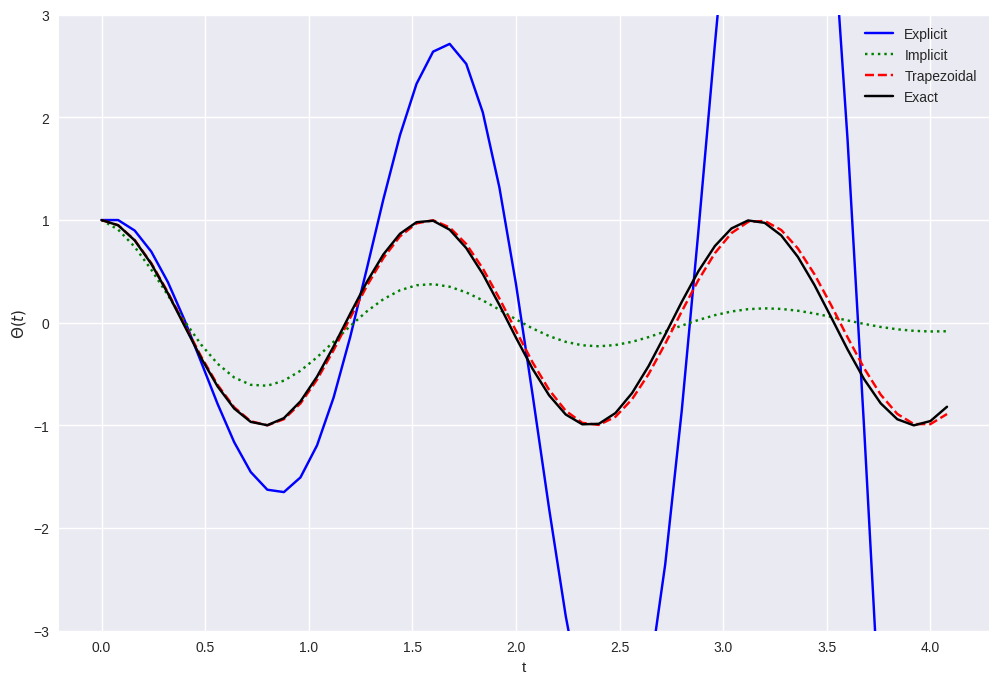

In [3]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

%matplotlib inline

h = 0.08 # step size
t = np.arange(0,4.1,h) # numerical grid
w = 4 # oscillation of pendulum
s0 = np.array([[1],[0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

The figure allows for a visual comparison of the various numerical solutions to the pendulum problem. The black line, the exact line, is our exact solution, a cosine wave. 

**20.5 Predictor-Corrector and Runge Kutta Methods**

Predictor-Corrector Methods of solving initial value problems improve the approximation accuracy of non-predictor-corrector methods by querying the function several times at different locations/predictions, and then using a weighted average of the resultscorrections to update the state.

Runga Kutta methods are one of the most widely used methods for solving ODEs. They are based on truncated Taylor series that do not require computation of those higher derivatives.

**20.6 Python ODE Solvers**

The *scipy* function in Python contains several built-in functions for solving initial value problems. The most common one is *scipy.integrate.solve_ivp*.

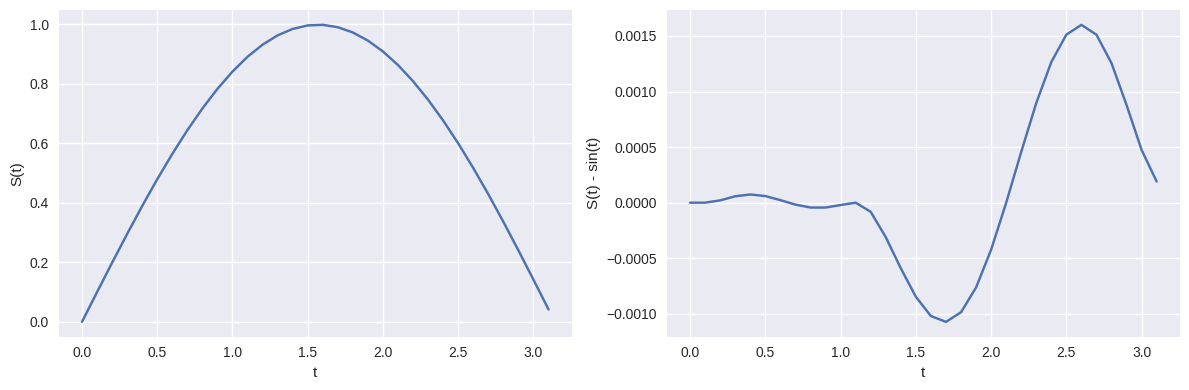

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-v0_8')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

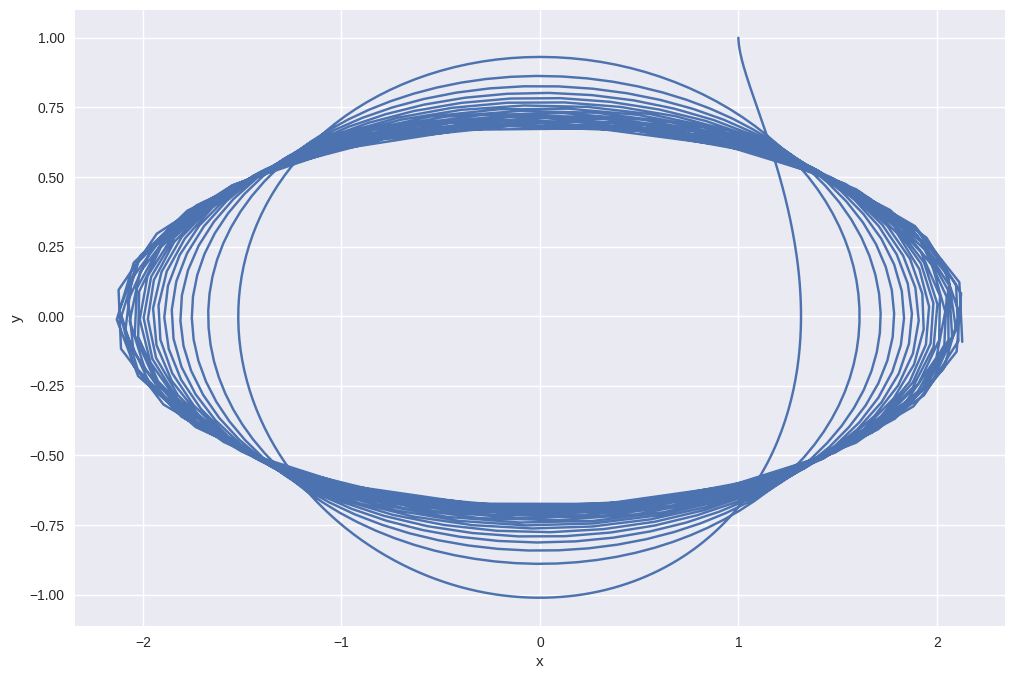

In [5]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()